# Predicting NBA MVP - Cleaning and EDA

Now that I have my data, I need to get it in shape to use. I'll drop columns from two datasets if they're in all three datasets. That will make it less confusing to merge the datasets together. There are also some asterisks and maybe other uncommon characters that will need dropped. I'll start with the mvp data first.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning the data

In [2]:
mvp = pd.read_csv('mvps.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')

### MVP data

I don't need all the columns, so I'll subset the ones I want to keep.

In [3]:
mvp = mvp[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvp.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


### Players data 

This dataset will be a bit more involved. There are asterisks after some players' names that I'll need to get rid of so the dataframes will merge correctly.

In [4]:
players.head(25)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,...,0.6,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,6,7,Mark Alarie,PF,27,WSB,42,1,14.0,2.4,...,1.0,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991
7,7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,...,0.3,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991
8,8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


Looking at the data, there are a few things I need to fix. First, there are extra columns that can be dropped. Then I need to get rid of the asterisks. I also see several rows with Greg Anderson for 1991 all for different teams. 

In [5]:
# first I'll drop the unnecessary columns

players.drop(['Unnamed: 0', 'Rk'], axis = 1, inplace = True)

In [6]:
# then I'll get rid of asterisks

players['Player'] = players['Player'].str.replace('*','', regex=False)

In [7]:
players[players['Tm'] == 'TOT']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
26,Kenny Battle,SG,26,TOT,56,8,16.9,2.4,5.0,.472,...,1.5,1.7,3.1,1.1,1.1,0.3,0.9,1.9,6.1,1991
30,Benoit Benjamin,C,26,TOT,70,65,31.9,5.5,11.1,.496,...,2.2,8.1,10.3,1.7,0.8,2.1,3.4,2.6,14.0,1991
49,Tony Brown,SG-SF,30,TOT,30,0,9.8,1.0,2.7,.375,...,0.8,0.6,1.4,0.5,0.1,0.0,0.5,1.6,2.8,1991
77,Lester Conner,PG,31,TOT,74,4,13.6,1.3,2.8,.464,...,0.3,1.2,1.5,2.2,1.1,0.0,0.8,1.0,3.5,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17997,Moritz Wagner,C,23,TOT,45,24,16.0,2.3,5.1,.454,...,0.6,2.6,3.2,1.1,0.6,0.4,1.0,2.4,6.9,2021
18004,Brad Wanamaker,PG,31,TOT,61,0,17.3,1.9,4.9,.385,...,0.3,1.4,1.7,2.9,0.7,0.2,1.2,1.5,5.5,2021
18022,Lou Williams,PG,34,TOT,66,4,21.6,4.0,9.8,.410,...,0.3,1.8,2.1,3.4,0.7,0.1,1.6,0.9,11.3,2021
18028,D.J. Wilson,PF,24,TOT,35,1,12.4,1.9,4.8,.405,...,0.6,2.6,3.2,0.7,0.3,0.5,0.6,1.3,5.2,2021


Greg Anderson isn't the only player who played on several teams in one year. It looks like there have been over 1,500 between 1991 and 2021. I'll need to group the players by name and year. Then using apply, I'll check each player separately. If that player has TOT for a Tm, I'll keep the stats from the TOT row, but assign the team from the last row of their stats. For example, Greg Anderson has a TOT entry for team, so I'll keep those state but assign the team as DEN since that's the team in the last row of his entries for 1991.

In [8]:
def keep_tot(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df['Tm']=='TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row

In [9]:
# use my function to only keep one row per player per year
players = players.groupby(['Player', 'Year']).apply(keep_tot)
players

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Year                                                        
A.C. Green     1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   
               1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   
               1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   
               1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7   
               1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   
...                                  ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002 6095  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003 6595  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004 7176  Željko Rebrača   C  31  ATL  24   2  11.4  1.4   
               2005 7776  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006 8370  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                           FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                   ...                                      
A.C. Green     1991 164    6.6  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
               1992 633    9.8  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
               1993 1092   8.6  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
               1994 1579  11.3  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
               1995 2067   7.5  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
...                        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 6095   5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 6595   4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 7176   3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 7776   4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 8370   3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  Year  
Player         Year                        
A.C. Green     1991 164   1.4   9.1  1991  
               1992 633   1.7  13.6  1992  
               1993 1092  1.8  12.8  1993  
               1994 1579  1.7  14.7  1994  
               1995 2067  1.8  11.2  1995  
...                       ...   ...   ...  
Željko Rebrača 2002 6095  2.6   6.9  2002  
               2003 6595  2.6   6.6  2003  
               2004 7176  2.2   3.8  2004  
               2005 7776  2.2   5.8  2005  
               2006 8370  2.0   4.7  2006  

[14092 rows x 30 columns]

In [10]:
# make sure players only have one row per year
players[players['Player'] == 'Greg Anderson']

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                             
Greg Anderson 1991 8     Greg Anderson  PF  26  DEN  68   2  13.6  1.7   4.0   
              1992 467   Greg Anderson  PF  27  DEN  82  82  34.1  4.7  10.4   
              1994 1412  Greg Anderson  PF  29  DET  77  47  21.1  2.6   4.8   
              1995 1911  Greg Anderson  PF  30  ATL  51   0  12.2  1.1   2.0   
              1996 2381  Greg Anderson  PF  31  SAS  46   7   7.5  0.5   1.0   
              1997 2948  Greg Anderson   C  32  SAS  82  48  20.2  1.6   3.2   
              1998 3541  Greg Anderson   C  33  ATL  50   0   8.0  0.7   1.6   

                          FG%  ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
Player        Year             ...                                            
Greg Anderson 1991 8     .430  ...  1.4  3.3   4.7  0.2  0.5  0.7  1.2  2.1   
              1992 467   .456  ...  4.1  7.4  11.5  1.0  1.1  0.8  2.5  3.2   
              1994 1412  .543  ...  2.4  5.0   7.4  0.7  0.7  0.9  1.2  3.0   
              1995 1911  .548  ...  1.2  2.5   3.7  0.3  0.5  0.6  0.6  2.0   
              1996 2381  .511  ...  0.6  1.5   2.2  0.2  0.2  0.5  0.5  1.4   
              1997 2948  .496  ...  1.9  3.5   5.5  0.4  0.8  0.8  0.9  2.7   
              1998 3541  .444  ...  0.8  1.6   2.4  0.3  0.4  0.2  0.3  1.7   

                          PTS  Year  
Player        Year                   
Greg Anderson 1991 8      4.3  1991  
              1992 467   11.5  1992  
              1994 1412   6.4  1994  
              1995 1911   2.9  1995  
              1996 2381   1.2  1996  
              1997 2948   3.9  1997  
              1998 3541   1.8  1998  

[7 rows x 30 columns]

In [11]:
# ungroup the data now that we don't need it grouped by players and years
# ungroup twice since it was grouped on two columns
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [12]:
players.head(2)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992


#### Merge mvp and players

I should be able to merge my players data with the mvp data now. Keeping my fingers crossed!!

In [13]:
# merge data from mvp and players
# use outer merge to keep all rows for players
# adds columns from players to rows in mvp but will give NaN values for mvp columns that aren't in players
# join on player and year
combined = players.merge(mvp, how="outer", on=["Player", "Year"])

In [14]:
# see how the data looks by checking out players who got mvp votes
# there were 474 rows in mvp so should show 474 rows
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
187,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


I know I have rows with NaN values for players who didn't get any MVP votes. I'll fill the NaNs in those columns with 0.

In [15]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [16]:
combined.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
5,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
6,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
7,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
8,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0
9,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,1.0,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0


### Team data

In [17]:
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


I'll drop the Unnamed: 0 column right off. Some header rows ended up being included in the data, so I'll drop those. They all include the word Division, so I'll  use that to drop the correct rows. There are also asterisks after some of the Teams, so those will need to disappear. In this data, the Team column has the long version of the team name, but the other data only has abbreviations. I'll need to set up a dictionary to combine those correctly.

In [18]:
# drop Unnamed: 0 column
del teams['Unnamed: 0']

In [19]:
# drop header rows
teams = teams[~teams["W"].str.contains("Division")]

In [20]:
# get rid of asterisks
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

To get a dictionary of the team names and abbreviations, I can sort both and then combine them after making sure there's nothing wonky to fix first, such as a team having two abbreviations or team name being misspelled somewhere.

In [21]:
# sort team names from Teams data
sort1 = sorted(teams["Team"].unique())
# print makes the list print more than one name per row
print(sort1)

['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Bobcats', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Jersey Nets', 'New Orleans Hornets', 'New Orleans Pelicans', 'New Orleans/Oklahoma City Hornets', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Seattle SuperSonics', 'Toronto Raptors', 'Utah Jazz', 'Vancouver Grizzlies', 'Washington Bullets', 'Washington Wizards']


In [22]:
# sort team abbreviations from combined data
sort2 = sorted(combined["Tm"].unique())
# using print make the list print out with more than one name per row
print(sort2)

['ATL', 'BOS', 'BRK', 'CHA', 'CHH', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS', 'WSB']


In [23]:
print('team names has', len(sort1), 'names and team abbreviations has', len(sort2), 'names')

team names has 37 names and team abbreviations has 38 names


There's an extra abbreviation, so I'll take a closer look at the lists to see what's going on.

The abbreviation CHO doesn't seem to match anything, so I'll check the website. The New Orleans abbreviations are out of order so I'll need to rearrange those. The two abbreviations for Washington teams will also need switched around to match the names. 

In [24]:
combined[combined['Tm'] == 'CHO']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
49,Aaron Harrison,SG,21,CHO,21,0,4.4,0.2,0.9,.263,...,0.1,0.3,0.0,0.2,0.5,0.9,2016,0.0,0.0,0.0
50,Aaron Harrison,SG,22,CHO,5,0,3.4,0.0,0.8,.000,...,0.6,0.0,0.0,0.0,0.4,0.2,2017,0.0,0.0,0.0
188,Al Jefferson,C,30,CHO,65,61,30.6,7.5,15.5,.481,...,1.7,0.7,1.3,1.0,2.1,16.6,2015,0.0,0.0,0.0
189,Al Jefferson,C,31,CHO,47,18,23.3,5.2,10.7,.485,...,1.5,0.6,0.9,0.7,2.5,12.0,2016,0.0,0.0,0.0
1211,Bismack Biyombo,C,22,CHO,64,21,19.4,1.6,2.9,.543,...,0.3,0.3,1.5,0.8,2.2,4.8,2015,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,Tyler Hansbrough,PF,30,CHO,44,0,7.8,0.7,1.6,.451,...,0.2,0.3,0.2,0.3,1.3,2.4,2016,0.0,0.0,0.0
13537,Vernon Carey Jr.,C,19,CHO,19,4,6.1,0.9,1.9,.500,...,0.1,0.1,0.3,0.3,0.7,2.4,2021,0.0,0.0,0.0
13906,Willy Hernangómez,C,23,CHO,48,1,10.3,1.9,3.4,.555,...,0.7,0.4,0.3,0.7,1.3,5.1,2018,0.0,0.0,0.0
13907,Willy Hernangómez,C,24,CHO,58,3,14.0,2.6,5.1,.519,...,1.0,0.3,0.3,1.0,1.7,7.3,2019,0.0,0.0,0.0


According to the website, CHO is the Charleston Hornets. The abbreviation CHH is also the Charleston Hornets. I'll change the CHO to CHH in the data and that should fix my dictionary.

In [25]:
print('There are', len(combined[combined['Tm'] == 'CHO']), 'rows with CHO and', len(combined[combined['Tm'] == 'CHH']), 'rows with CHH')

There are 113 rows with CHO and 177 rows with CHH


In [26]:
# change Tm values of CHO to CHH
# there were 177 rows with CHH and 113 with CHO, so I should have 290 rows with CHH now
combined['Tm'] = combined['Tm'].str.replace('CHO', 'CHH')

len(combined[combined['Tm'] == 'CHH'])

290

Now I can create my dictionary. I'll need to rearrange a few abbreviations, but printing out my lists earlier makes it easier. I'll use the sort1 list (unabbreviated team names) from before as the values. I want the abbreviations as the key so I can map the team names into the combined dataset, which already has the abbreviations.

In [27]:
# rearranged abbreviations to match team names
list_values = ['ATL', 'BOS', 'BRK', 'CHA', 'CHH', 'CHI', 
               'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 
               'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 
               'MIN', 'NJN', 'NOH', 'NOP', 'NOK', 'NYK', 
               'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 
               'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WSB', 'WAS']

team_dict = dict(zip(list_values, sort1))

In [28]:
print(team_dict)

{'ATL': 'Atlanta Hawks', 'BOS': 'Boston Celtics', 'BRK': 'Brooklyn Nets', 'CHA': 'Charlotte Bobcats', 'CHH': 'Charlotte Hornets', 'CHI': 'Chicago Bulls', 'CLE': 'Cleveland Cavaliers', 'DAL': 'Dallas Mavericks', 'DEN': 'Denver Nuggets', 'DET': 'Detroit Pistons', 'GSW': 'Golden State Warriors', 'HOU': 'Houston Rockets', 'IND': 'Indiana Pacers', 'LAC': 'Los Angeles Clippers', 'LAL': 'Los Angeles Lakers', 'MEM': 'Memphis Grizzlies', 'MIA': 'Miami Heat', 'MIL': 'Milwaukee Bucks', 'MIN': 'Minnesota Timberwolves', 'NJN': 'New Jersey Nets', 'NOH': 'New Orleans Hornets', 'NOP': 'New Orleans Pelicans', 'NOK': 'New Orleans/Oklahoma City Hornets', 'NYK': 'New York Knicks', 'OKC': 'Oklahoma City Thunder', 'ORL': 'Orlando Magic', 'PHI': 'Philadelphia 76ers', 'PHO': 'Phoenix Suns', 'POR': 'Portland Trail Blazers', 'SAC': 'Sacramento Kings', 'SAS': 'San Antonio Spurs', 'SEA': 'Seattle SuperSonics', 'TOR': 'Toronto Raptors', 'UTA': 'Utah Jazz', 'VAN': 'Vancouver Grizzlies', 'WSB': 'Washington Bullets',

In [29]:
combined["Team"] = combined["Tm"].map(team_dict)

In [30]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


#### Merge team stats into players stats

Now that I have the unabbreviated Team name in the combined data, I can merge the teams data with the already combined mvp and player data. Since I want to add the team stats to each player, I'll use the Team and Year columns from Team. I want an outer merge so I keep all the players. 

In [31]:
# merge teams data with combined data to add team stats for each player
stats = combined.merge(teams, how="outer",on=["Team", "Year"])

In [32]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73


In [33]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  object 
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  object 
 5   GS       14092 non-null  object 
 6   MP       14092 non-null  object 
 7   FG       14092 non-null  object 
 8   FGA      14092 non-null  object 
 9   FG%      14042 non-null  object 
 10  3P       14092 non-null  object 
 11  3PA      14092 non-null  object 
 12  3P%      12050 non-null  object 
 13  2P       14092 non-null  object 
 14  2PA      14092 non-null  object 
 15  2P%      14008 non-null  object 
 16  eFG%     14042 non-null  object 
 17  FT       14092 non-null  object 
 18  FTA      14092 non-null  object 
 19  FT%      13630 non-null  object 
 20  ORB      14092 non-null  object 
 21  DRB      140

Lots of the columns need to be changed to numeric data types

In [34]:
# this should convert any columns that are object datatypes to a numeric datatype
# the errors = ignore means columns that can't be changed to numeric won't throw an error
stats = stats.apply(pd.to_numeric, errors='ignore')

In [35]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

All the columns except GB were converted. The GB column should have switched to numeric, too, so I'll check on that.

In [36]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

There's a hyphen in the data, so I'll need to change that. Since GB means games back from leader, the hyphen means that team is the leader for that year. I'll change the hyphen to a 0 to refelct that.

In [40]:
stats['GB'] = pd.to_numeric(stats['GB'].str.replace('—','0'))

In [41]:
stats['GB'].unique()

array([ 5. , 14. , 23. ,  7. ,  0. , 40. , 42. , 18. ,  6. , 24. , 26. ,
       37. , 29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. , 17. ,  3. ,
       15. ,  9. ,  2. , 35. , 20. , 11. , 16. , 41. , 12. , 50. , 10. ,
       30. , 34. ,  4. ,  1.5, 22. , 51. , 36. , 43. , 39. , 18.5, 48. ,
       46. , 10.5, 32. , 38. , 27. , 33. , 31. , 21.5, 45. , 22.5, 25.5,
        3.5, 20.5, 11.5, 44. , 52. , 56. ,  2.5, 12.5, 47. , 32.5,  4.5])

In [42]:
# save the cleaned stats file as csv
stats.to_csv('all_stats.csv')

## EDA

Now that my data is cleaned up, I want to look into it further to see which columns will be more significant in predicting the MVP.

In [44]:
# look at the highest scorers between 1991 and 2021
highest_score = stats.sort_values('PTS', ascending = False).head(10)

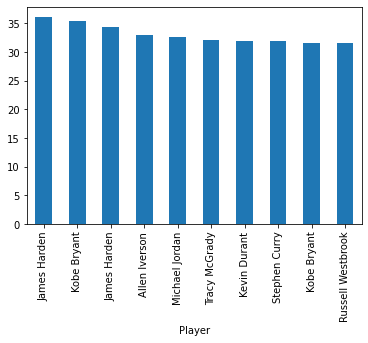

In [70]:
highest_score.plot.bar(x = 'Player', y = 'PTS', legend = False);

In [52]:
# Look at highest scoring playerby year
high_scorer_per_year = stats.groupby('Year').apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
high_scorer_per_year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,9927,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
1992,9940,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,9953,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,8684,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7348,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10510,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10524,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10538,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,937,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56


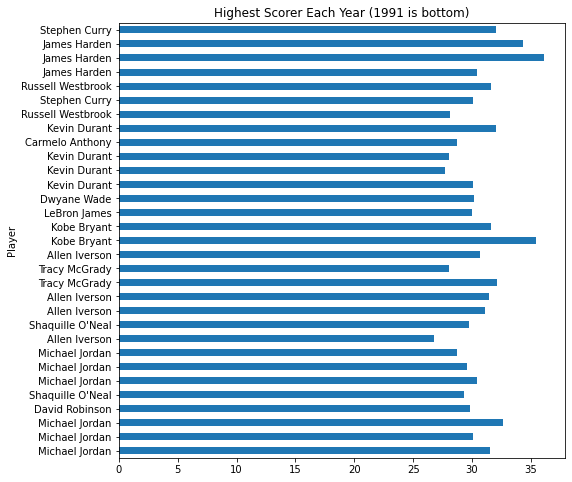

In [69]:
high_scorer_per_year.plot.barh(x = 'Player', y = 'PTS', figsize=(8,8), title = 'Highest Scorer Each Year (1991 is bottom)', legend = False);

In [71]:
# how many players do I have for each year
stats.groupby("Year").apply(lambda x: x.shape[0])

Year
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
dtype: int64

In [80]:
# which variables have a higher correlation with Share
# Share is the percentage of votes for MVP players received
stats.corr()['Share'].sort_values(ascending = False)


Share      1.000000
Pts Won    0.995153
Pts Max    0.521335
FTA        0.321457
FT         0.316392
PTS        0.288267
FG         0.276365
2P         0.275976
2PA        0.251885
FGA        0.249254
TOV        0.233015
DRB        0.213241
AST        0.200253
TRB        0.186209
STL        0.175041
GS         0.167476
MP         0.162175
BLK        0.154713
W/L%       0.126559
SRS        0.122782
W          0.122718
ORB        0.101375
3PA        0.096460
3P         0.096225
G          0.089282
PF         0.071046
FG%        0.065789
2P%        0.063240
eFG%       0.059335
PS/G       0.045206
FT%        0.037875
Age        0.018596
3P%        0.013611
Year      -0.008135
PA/G      -0.039617
GB        -0.101014
L         -0.121866
Name: Share, dtype: float64

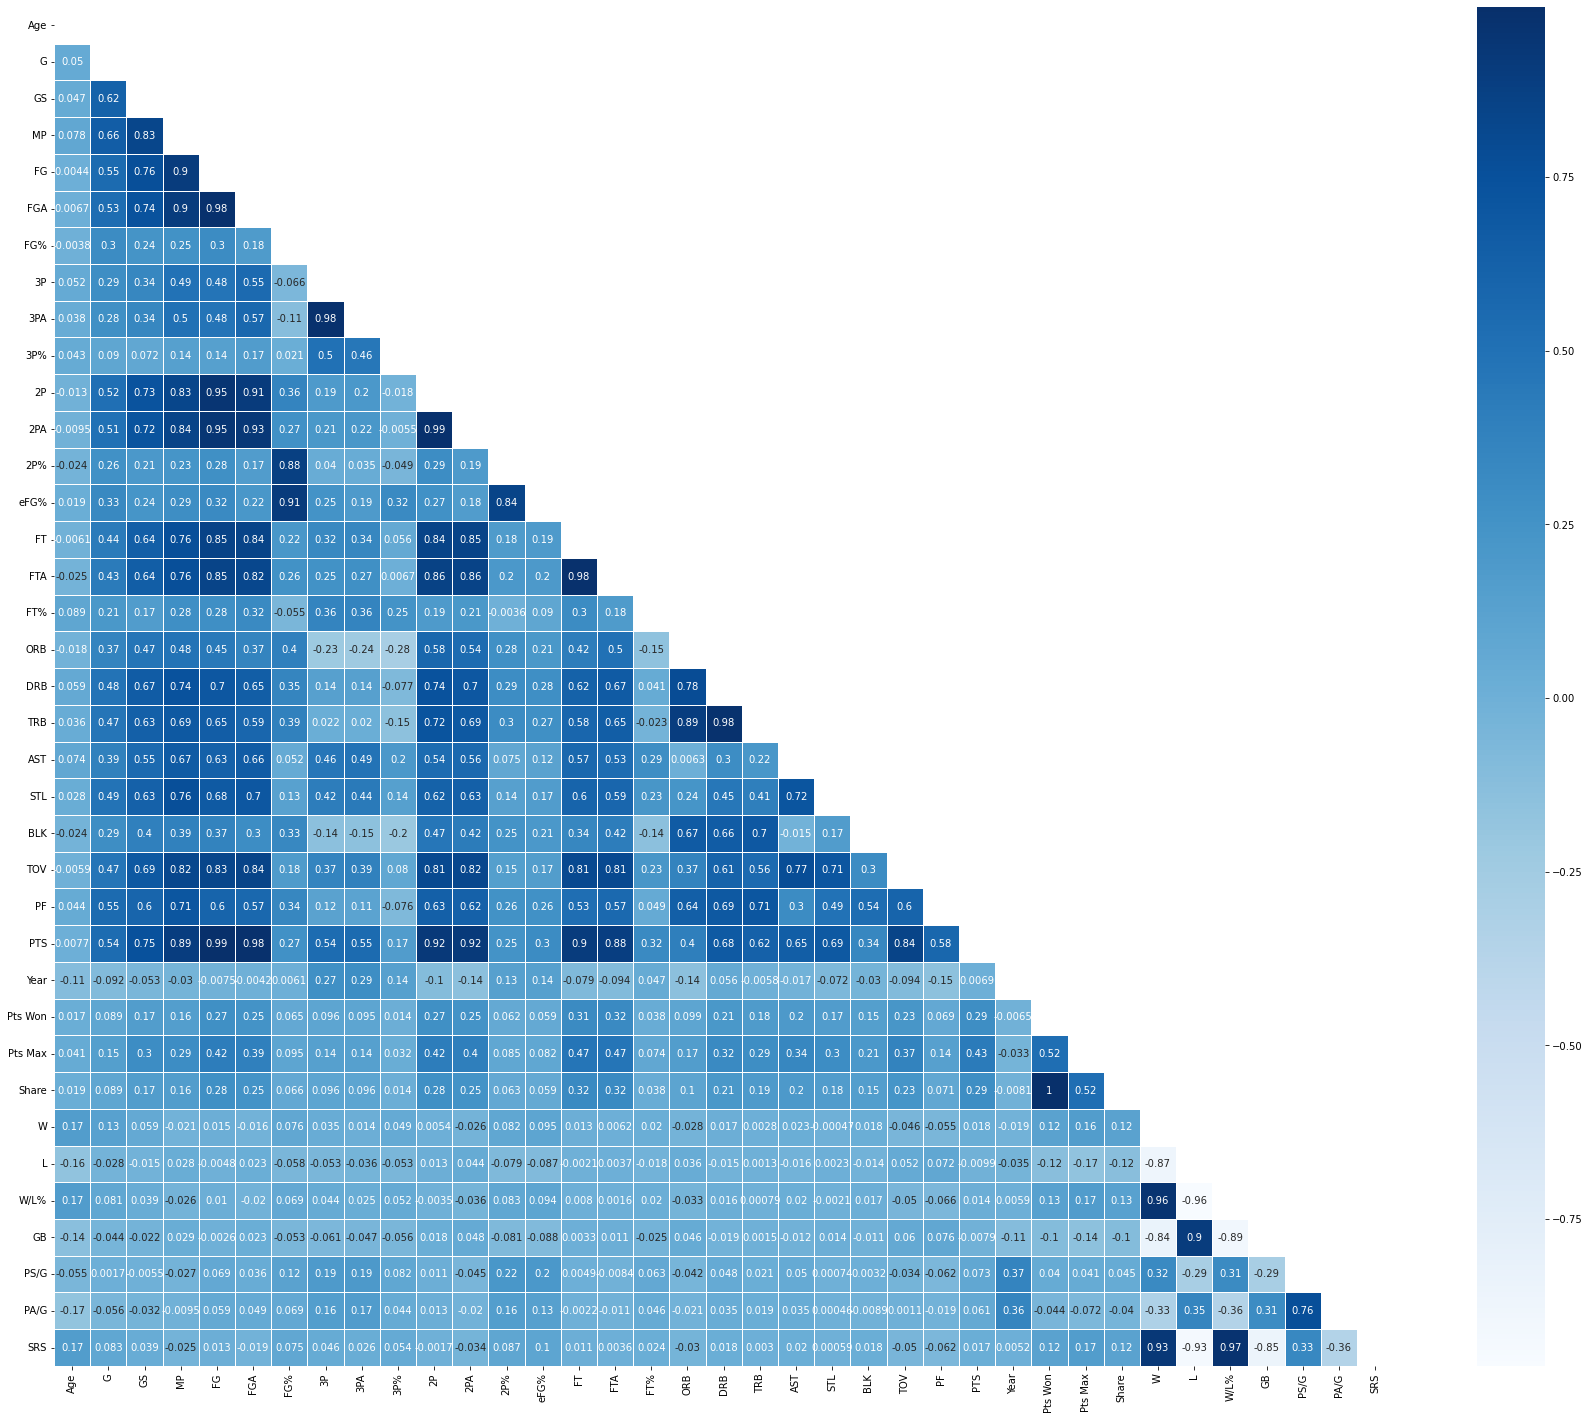

In [97]:
plt.figure(figsize = (30, 25))
corr_matrix=stats.corr()
    
#create a mask 
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
    
# Draw the heatmap with the mask
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=.75, cmap ="Blues")
plt.show()

Looking at the Share row, we can see that Pts Won and Pts Max are obvious correlations with Share. The others worth investigating are:
Pts, TDV, DRB, FTA, FT, 2PA, 2P, FGA, and FG. 